<a href="https://colab.research.google.com/github/kleczekr/tolkenizer/blob/master/violence2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline 

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.style.use(['ggplot']) # optional: for ggplot-like style

In [3]:
# This cell is meant to accommodate the Google Colab way of dealing with reading 
# files from Google Drive; feel free to ignore it if you are running the notebook
# on your local machine
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_excel('/content/drive/My Drive/ethnic_violence/globalterrorismdb_0919dist.xlsx')

In [5]:
casualties_by_year = df.groupby('iyear').nkill.sum()

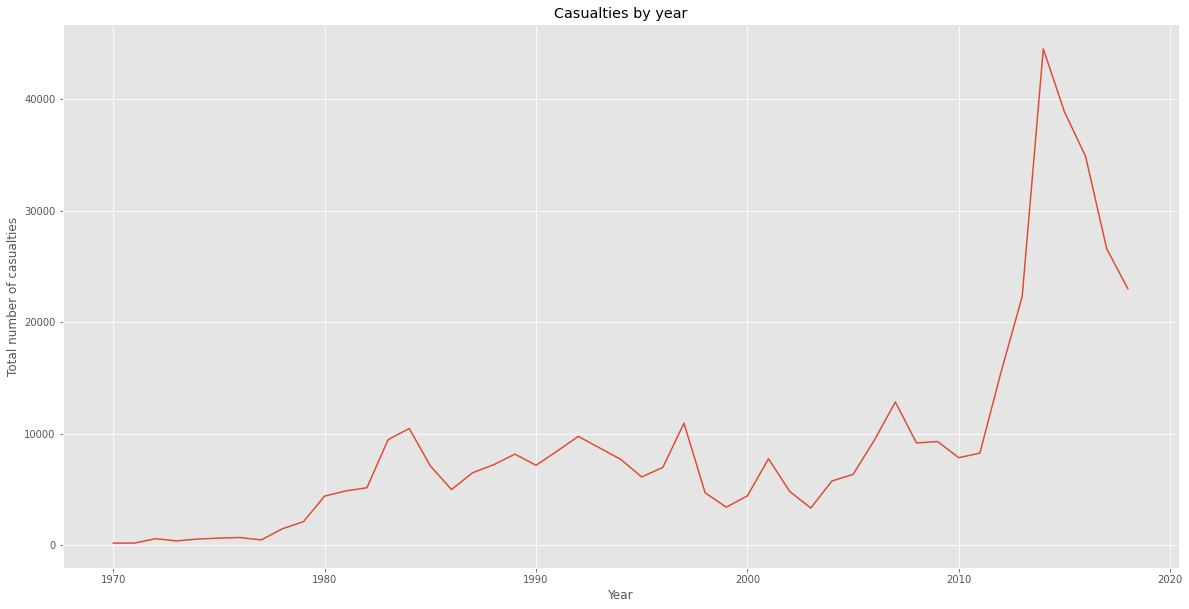

In [6]:
casualties_by_year.plot(kind='line', figsize=(20, 10))

plt.title('Casualties by year')
plt.ylabel('Total number of casualties')
plt.xlabel('Year')

plt.show() # need this line to show the updates made to the figure

There is a mysterious spike in the total number of casualties somewhere around the year 2014. Let's go back to the raw data, try to pinpoint the year, and investigate in in some more detail.

In [7]:
casualties_by_year

iyear
1970      174.0
1971      173.0
1972      566.0
1973      370.0
1974      539.0
1975      617.0
1976      674.0
1977      456.0
1978     1459.0
1979     2100.0
1980     4391.0
1981     4851.0
1982     5136.0
1983     9444.0
1984    10450.0
1985     7094.0
1986     4976.0
1987     6482.0
1988     7206.0
1989     8152.0
1990     7148.0
1991     8429.0
1992     9742.0
1994     7690.0
1995     6103.0
1996     6966.0
1997    10924.0
1998     4688.0
1999     3394.0
2000     4411.0
2001     7735.0
2002     4805.0
2003     3317.0
2004     5743.0
2005     6331.0
2006     9380.0
2007    12824.0
2008     9157.0
2009     9277.0
2010     7829.0
2011     8246.0
2012    15501.0
2013    22273.0
2014    44492.0
2015    38853.0
2016    34858.0
2017    26568.0
2018    22987.0
Name: nkill, dtype: float64

It seems that the years 2014 and 2015 have disproportionately high number of total casualties. Let's display casualties by country for data for the year 2014.

In [8]:
condition = df.iyear == 2014
cas_by_ctr_2014 = df[condition].groupby('country_txt').nkill.sum()

In [9]:
# in order to avoid truncating
pd.set_option('display.max_rows', 500)

In [10]:
cas_by_ctr_2014.sort_values(ascending=False).head()

country_txt
Iraq           13965.0
Nigeria         7781.0
Afghanistan     5414.0
Syria           3312.0
Pakistan        2413.0
Name: nkill, dtype: float64

Let's try the same for the year 2015:

In [11]:
condition1 = df.iyear == 2015
cas_by_ctr_2015 = df[condition1].groupby('country_txt').nkill.sum()

In [12]:
cas_by_ctr_2015.sort_values(ascending=False).head()

country_txt
Iraq           8885.0
Afghanistan    6216.0
Nigeria        5559.0
Syria          3924.0
Yemen          2375.0
Name: nkill, dtype: float64

It seems that the spike in casualty rates in the years 2014-2015 was largely caused by the situation in Middle East and North Africa, primarily in Iraq, Nigeria and Afghanistan. While this does not explain the situation in Afghanistan and Nigeria, the disproportionately large number of casualties in Iraq can be explained by progress of the Iraqi Civil War. Let's annotate the graph:

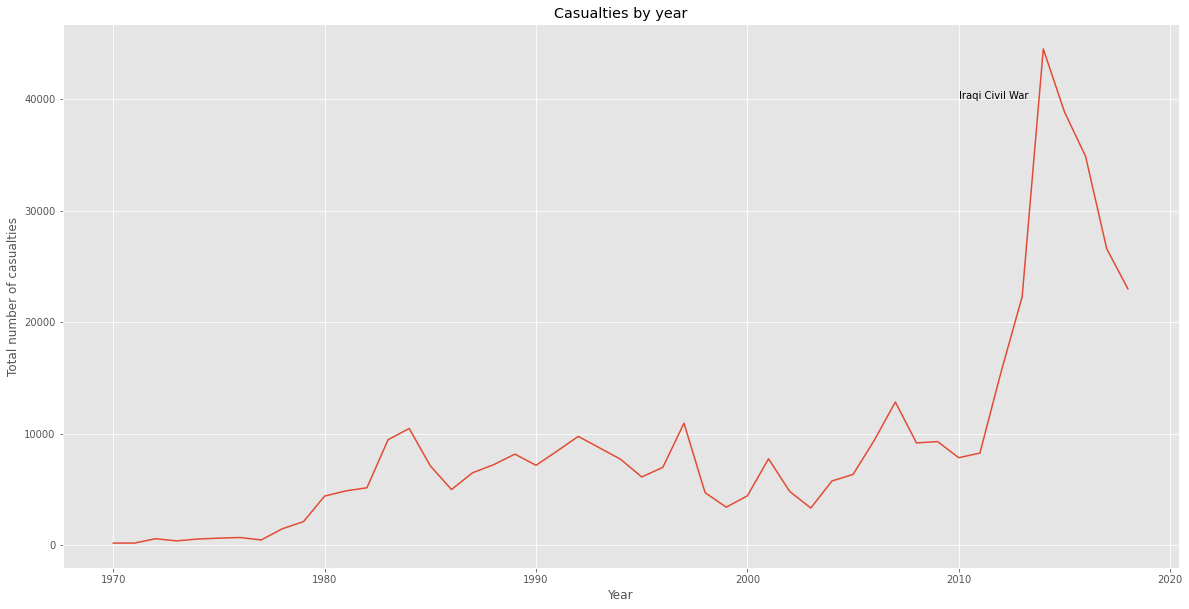

In [13]:
casualties_by_year.plot(kind='line', figsize=(20, 10))

plt.title('Casualties by year')
plt.ylabel('Total number of casualties')
plt.xlabel('Year')
plt.text(2010, 40000, 'Iraqi Civil War')

plt.show() # need this line to show the updates made to the figure